In [1]:
import pandas as pd
import src.text_tools as tt
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
ydf = pd.read_csv('./data/yhat_full.csv', sep='|')

In [3]:
states_df = tt.get_states_df()
monuments_df = tt.get_nm_df()

In [34]:
#okay now look at ydf
#our goal is to find 4 categories for when a monument is present
#0: no state, 1:same state only, 2:out of state only, 3:both in/out state 
#3 could be out of state, based on the fact that the commenter is using the
#state of interest as specifier and the out of state as an address
#iterate through the database
#if there is/are monuments
#generate a list of monuments
#find the state(s) the monument(s) is/are in
#find if the states that are mentioned in the ydf


In [6]:
ydf

id  \
0         DOI-2017-0002-0002   
1         DOI-2017-0002-0003   
2         DOI-2017-0002-0004   
3         DOI-2017-0002-0005   
4         DOI-2017-0002-0006   
5         DOI-2017-0002-0007   
6         DOI-2017-0002-0008   
7         DOI-2017-0002-0009   
8         DOI-2017-0002-0010   
9         DOI-2017-0002-0011   
10        DOI-2017-0002-0012   
11        DOI-2017-0002-0013   
12        DOI-2017-0002-0014   
13        DOI-2017-0002-0015   
14        DOI-2017-0002-0016   
15        DOI-2017-0002-0017   
16        DOI-2017-0002-0018   
17        DOI-2017-0002-0019   
18        DOI-2017-0002-0020   
19        DOI-2017-0002-0021   
20        DOI-2017-0002-0022   
21        DOI-2017-0002-0023   
22        DOI-2017-0002-0024   
23        DOI-2017-0002-0025   
24        DOI-2017-0002-0026   
25        DOI-2017-0002-0027   
26        DOI-2017-0002-0028   
27        DOI-2017-0002-0029   
28        DOI-2017-0002-0030   
29        DOI-2017-0002-0031   
...                      ...   
246517  DOI-2017-0002-782693   
246518  DOI-2017-0002-782696   
246519  DOI-2017-0002-782707   
246520  DOI-2017-0002-782712   
246521  DOI-2017-0002-782713   
246522  DOI-2017-0002-782729   
246523  DOI-2017-0002-782733   
246524  DOI-2017-0002-782748   
246525  DOI-2017-0002-782750   
246526  DOI-2017-0002-782762   
246527  DOI-2017-0002-782780   
246528  DOI-2017-0002-782782   
246529  DOI-2017-0002-782785   
246530  DOI-2017-0002-782826   
246531  DOI-2017-0002-782829   
246532  DOI-2017-0002-782836   
246533  DOI-2017-0002-782844   
246534  DOI-2017-0002-782863   
246535  DOI-2017-0002-782885   
246536  DOI-2017-0002-782905   
246537  DOI-2017-0002-782911   
246538  DOI-2017-0002-782915   
246539  DOI-2017-0002-782928   
246540  DOI-2017-0002-782932   
246541  DOI-2017-0002-782934   
246542  DOI-2017-0002-782944   
246543  DOI-2017-0002-782948   
246544  DOI-2017-0002-782959   
246545  DOI-2017-0002-782962   
246546  DOI-2017-0002-782969   

                                                     text  \
0       Our national monuments are a national treasure...   
1       1.We do not want National Monument protection ...   
2       The monuments must be preserved. the precedent...   
3       My name is Ryan Erik Benally and I'm from Mont...   
4       all protections and preservations for the enti...   
5       National Monuments are an important part of Am...   
6                                                  dgfdfg   
7                                                      hm   
8       I am in favor of keeping all existing monument...   
9       When you look at what other leading industrial...   
10      Protect our national monuments, do not open ou...   
11      I am a resident of Utah.  I want to comment on...   
12      Please do not rescind or reduce the size of an...   
13      PUBLIC LANDS NEED TO STAY OPEN TO THE PUBLIC F...   
14      I believe that it is very important to protect...   
15      Our National Monuments or the 1906 Antiquities...   
16      Secretary ZinkeWhen you look at these National...   
17      I support the designation of Bears Ears Nation...   
18      The Antiquities Act has been abused as a tool ...   
19      I oppose reduction or elimination of sites des...   
20      I am so thrilled that Bears Ears was made a Na...   
21      Honorable Mr. Zinke, My name is Notah B. Tahy,...   
22      Please protect our National Monuments - Bears ...   
23                                                     hi   
24      Theodore Roosevelt's legacy as the Conservatio...   
25      Please do not open landmarks and marine sanctu...   
26      I am opposed to any monument expansion of the ...   
27      As an American citizen, I should have the free...   
28      It is my belief that once land is set aside fo...   
29      The national monuments under review are a pres...   
...                                                   ...   
246517  To Secretary Zinke, I am writing to ask you to...   
246518  "Dear Secretary Zink

In [56]:
all(elem in tt.code_st_mn(ydf.iloc[47]) for elem in [1,2])

True

In [67]:
def geocode(df):
    out = np.zeros(len(df))
    for i in range(len(df)):
        c = tt.code_st_mn(df.iloc[i])
        if all(elem in c for elem in [1,2]): 
            out[i] = 4
        elif len(c)!=0:
            out[i] = list(set(c))[0] + 1
    return(out)
geocoding = geocode(ydf)

In [32]:
no_nm_total = len(ydf[ydf['no_nm']==1])
no_st_total = len(ydf[ydf['no_state']==1])

In [69]:
np.save('./data/geocoding.npy', geocoding)

(array([148096.,      0.,  20208.,      0.,      0.,  32937.,      0.,  14743.,      0.,  30563.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

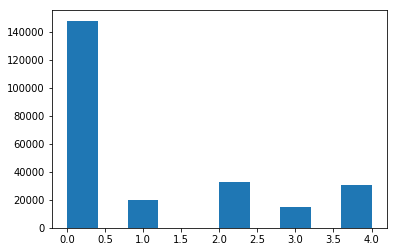

In [71]:
plt.hist(geocoding)

In [90]:
#proportion of in-state to out-of-state comments
print(len(ydf[ydf['geocode']==3])/len(ydf[ydf['geocode']==2]))

0.4476121079636883


In [73]:
ydf['geocode'] = geocoding

In [95]:
print(328/19395)
print(250/32591)
print(138/14510)
print(101/30454)

0.007670829370071492
0.009510682288077188
0.003316477310041374


(array([  9364., 134170.,   4562.]),
 array([0.     , 0.66667, 1.33333, 2.     ]),
 <a list of 3 Patch objects>)

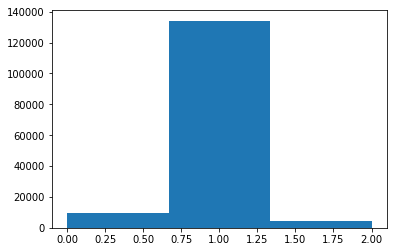

In [97]:
plt.hist(ydf[ydf['geocode']==0].pred_sentiment, bins=3)

(array([  485., 19395.,   328.]),
 array([0.     , 0.66667, 1.33333, 2.     ]),
 <a list of 3 Patch objects>)

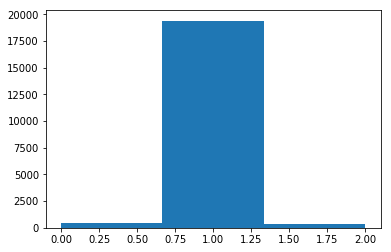

In [96]:
plt.hist(ydf[ydf['geocode']==1].pred_sentiment, bins=3)

(array([   96., 32591.,   250.]),
 array([0.     , 0.66667, 1.33333, 2.     ]),
 <a list of 3 Patch objects>)

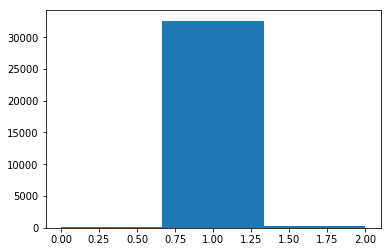

In [91]:
plt.hist(ydf[ydf['geocode']==2].pred_sentiment, bins=3)

(array([   95., 14510.,   138.]),
 array([0.     , 0.66667, 1.33333, 2.     ]),
 <a list of 3 Patch objects>)

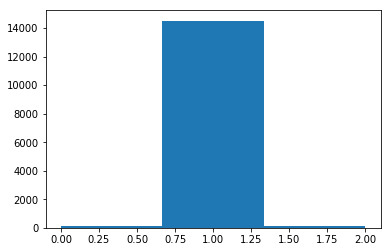

In [92]:
plt.hist(ydf[ydf['geocode']==3].pred_sentiment, bins=3)

(array([    8., 30454.,   101.]),
 array([0.     , 0.66667, 1.33333, 2.     ]),
 <a list of 3 Patch objects>)

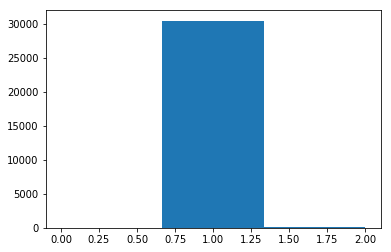

In [93]:
plt.hist(ydf[ydf['geocode']==4].pred_sentiment, bins=3)